<h1 align="center">Construindo um script Python para perguntas e respostas em linguagem natural usando LlamaIndex</h1>

Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

# Modelos OpenAI GPT3

Já ouvimos falar do `ChatGPT3` e de outras ferramentas semelhantes, como o `Bing Chat da Microsoft`. Obviamente, essas ferramentas são incríveis, pois facilitam o uso desses modelos poderosos por quase qualquer pessoa, simplesmente digitando uma pergunta sem a necessidade de qualquer experiência anterior em codificação.

No entanto, [no momento da redação deste artigo](https://zhijingeu.medium.com/building-a-python-script-for-natural-language-q-a-using-llamaindex-45e2ee60e2f3), ainda existem algumas limitações com essas ferramentas. Por exemplo, o `ChatGPT3` e o `Bing Chat` têm limites para a duração dos `prompts` e das `respostas`. No início de março de `2023`, para `Chat GPT3 são 4.096 tokens` (Abaixo descrevemos eles) e `2.000 tokens para Bing Chat`.

Portanto, inserir grandes volumes de texto em uma janela de `prompt` na esperança de obter uma resposta apenas produzirá a seguinte mensagem de erro.

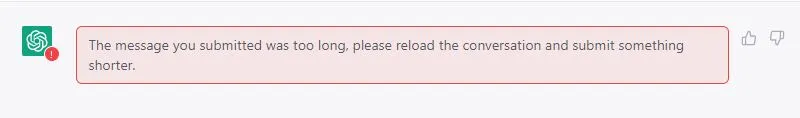

<font color="orange">Um Token é uma `sequência de caracteres` que os Large Language Models (`LLMs`) usam para entender as relações estatísticas entre esses tokens. Ou, se você preferir uma explicação mais simples - `OpenAI` sugere que `75 palavras` são cerca de `100 Tokens` GPT-3 explicados.</font>


A `OpenAI` fornece bibliotecas que permitem aos usuários chamar seus modelos por meio de uma `API` simples. Isso definitivamente ajuda no ajuste fino dos parâmetros do modelo. Infelizmente, os usuários ainda terão problemas com a `ingestão de dados`, pois há limites no número de tokens por prompt.

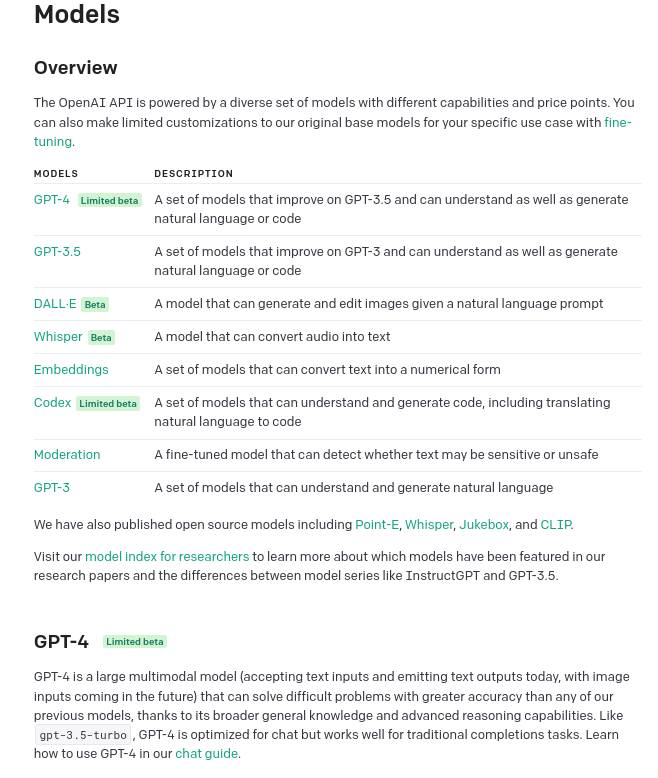

Existem soluções alternativas para esses limites de Tokens. No entanto, eles tendem a ser um tanto complicados e geralmente envolvem dividir o texto em blocos menores e fazer resumos desses blocos menores antes de resumir todos os resumos de blocos individuais.

# LlamaIndex

Portanto, o `LlamaIndex` é uma `biblioteca Python` realmente útil que oferece aos usuários um conjunto de estruturas de dados para `indexar` grandes volumes de dados para várias tarefas `LLM` e remover preocupações sobre `limitações de tamanho de prompt` e `ingestão de dados`.


Primeiro vamos instalar o LlamaIndex:

In [ ]:
!pip install llama-index

Em seguida, armazenaremos nossos Dados em uma única pasta chamada `'data'` e, em seguida, usaremos a  função `GPTSimpleVectorIndex` do `LlamaIndex`, que é uma boa ferramenta de uso geral para recuperação de documentos para assimilar todo o conteúdo.

In [17]:
import os
os.environ["OPENAI_API_KEY"] = 'YOUR_OPENAI_API_KEY'


from llama_index import GPTSimpleVectorIndex, SimpleDirectoryReader

documents = SimpleDirectoryReader('/home/eddygiusepe/1_Eddy_Giusepe/3_estudando_LLMs/Large_Language_Models_LLMs/Building_personal_assistant_with_LlamaIndex_and_GPT-3.5/data').load_data()

index = GPTSimpleVectorIndex(documents)


INFO:llama_index.token_counter.token_counter:> [build_index_from_documents] Total LLM token usage: 0 tokens
INFO:llama_index.token_counter.token_counter:> [build_index_from_documents] Total embedding token usage: 74938 tokens


Depois disso, podemos personalizar as configurações do preditor LLM:

In [28]:
# Ver link --> https://gpt-index.readthedocs.io/en/latest/how_to/custom_llms.html#example-using-a-custom-llm-model

from langchain import OpenAI
from llama_index import LLMPredictor

# save to disk (to avoid having to re-index the text later)
index.save_to_disk('/home/eddygiusepe/1_Eddy_Giusepe/3_estudando_LLMs/Large_Language_Models_LLMs/Building_personal_assistant_with_LlamaIndex_and_GPT-3.5/data/index.json')

# customize the LLM settings
llm_predictor = LLMPredictor(llm=OpenAI(temperature=0,
                                        model_name="text-davinci-003",
                                        max_tokens=1024))

# load from disk and set the LLM predictor
index = GPTSimpleVectorIndex.load_from_disk('/home/eddygiusepe/1_Eddy_Giusepe/3_estudando_LLMs/Large_Language_Models_LLMs/Building_personal_assistant_with_LlamaIndex_and_GPT-3.5/data/index.json',
                                            llm_predictor=llm_predictor)



<font color="orange">E então estamos todos prontos:</font>

In [29]:
resposta = index.query("Quanto custa uma camisa?") 
print(resposta)


INFO:llama_index.token_counter.token_counter:> [query] Total LLM token usage: 269 tokens
INFO:llama_index.token_counter.token_counter:> [query] Total embedding token usage: 9 tokens



R$ 30,00
